In [317]:
%autosave 30

Autosaving every 30 seconds


In [333]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [395]:
data = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [396]:
df = pd.DataFrame(data)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [397]:
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
df_test = df_test.drop(['Name', 'Ticket', 'Cabin'], axis=1) 

In [398]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [364]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [399]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [400]:
df = df.dropna(subset=['Embarked'])
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [367]:
df_test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [401]:
cols = ['Age', 'Fare']
for col in cols:
    df_test[col].fillna(df_test[col].median(), inplace=True)

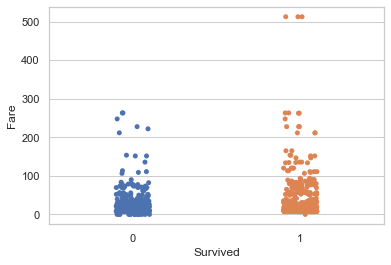

In [369]:
sns.set(style='whitegrid')
sns.stripplot(data=df, x='Survived', y='Fare')
plt.show()

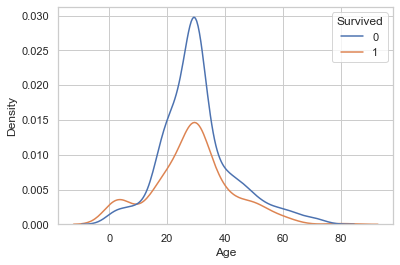

In [370]:
sns.kdeplot(data=df, x='Age', hue='Survived')
plt.show()

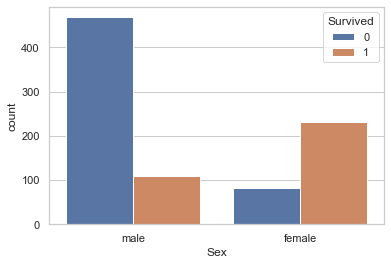

In [371]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.show()

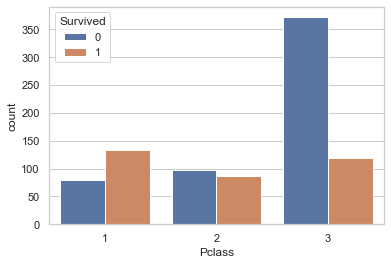

In [372]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.show()

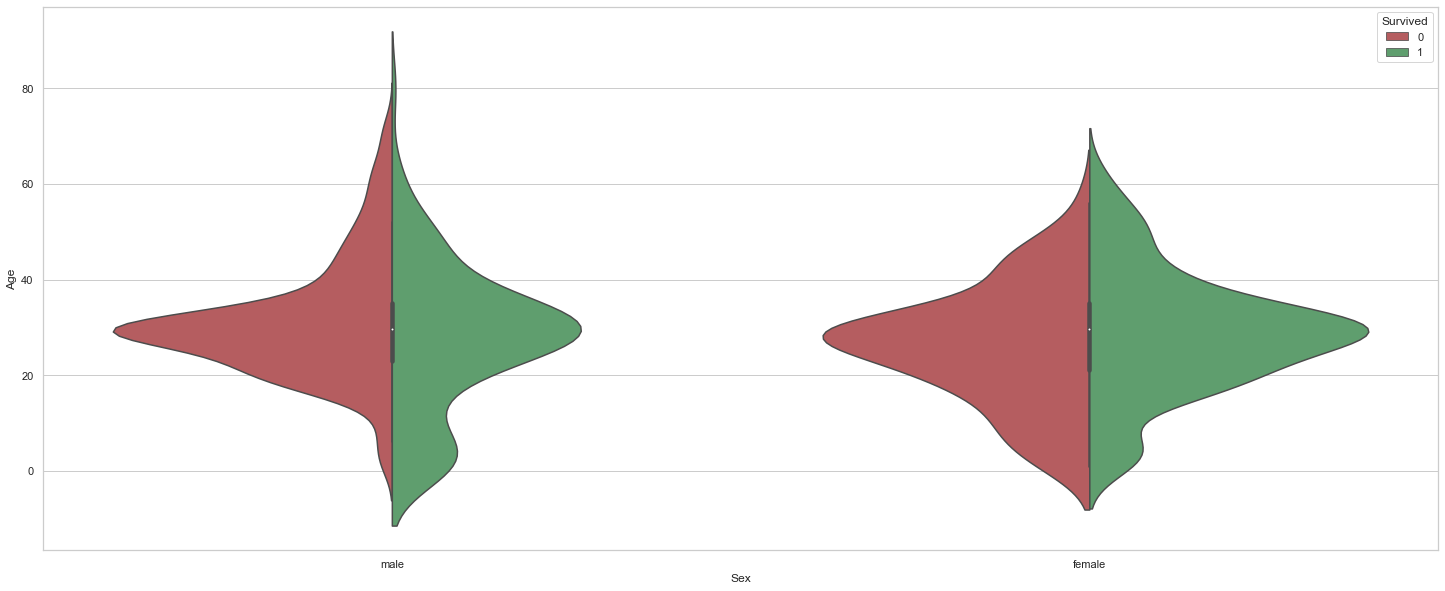

In [373]:
fig = plt.figure(figsize=(25, 10))
sns.violinplot(x='Sex', y='Age',
               hue='Survived', data=df,
               split=True,
               palette={0: 'r', 1: 'g'});

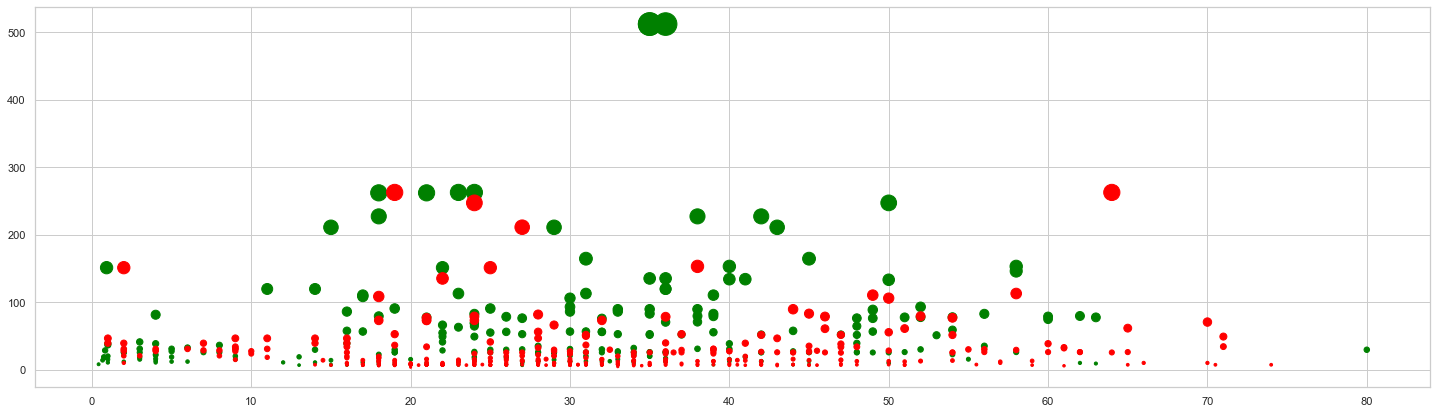

In [374]:
plt.figure(figsize=(25, 7))
ax = plt.subplot()

ax.scatter(data[data['Survived'] == 1]['Age'], data[data['Survived'] == 1]['Fare'], 
           c='green', s=data[data['Survived'] == 1]['Fare'])
ax.scatter(data[data['Survived'] == 0]['Age'], data[data['Survived'] == 0]['Fare'], 
           c='red', s=data[data['Survived'] == 0]['Fare']);

In [375]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [376]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [410]:
df.iloc[:, 3] = encoder.fit_transform(df.iloc[:, 3].values)
df.iloc[:, 8] = encoder.fit_transform(df.iloc[:, 8].values)

df_test.iloc[:, 2] = encoder.fit_transform(df_test.iloc[:, 2].values)
df_test.iloc[:, 7] = encoder.fit_transform(df_test.iloc[:, 7].values)

In [411]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare             int64
Embarked         int32
dtype: object

In [404]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()

In [405]:
X = df.drop(['Survived'], axis=1)
y = df[['Survived']]

In [440]:
X_scaled = s_scaler.fit_transform(X)

In [441]:
print(X_scaled)

[[-1.73250451  0.82520863  0.73534203 ... -0.47432585 -1.24731347
   0.58683958]
 [-1.72861124 -1.57221121 -1.35991138 ... -0.47432585  1.46177206
  -1.93955453]
 [-1.72471797  0.82520863 -1.35991138 ... -0.47432585 -0.91763639
   0.58683958]
 ...
 [ 1.72471797  0.82520863 -1.35991138 ...  2.00611934  0.37240433
   0.58683958]
 [ 1.72861124 -1.57221121  0.73534203 ... -0.47432585  0.68774762
  -1.93955453]
 [ 1.73250451  0.82520863  0.73534203 ... -0.47432585 -1.07530804
  -0.67635748]]


In [442]:
X_scaled_df = pd.DataFrame(X_scaled)
X_scaled_df.head()

,0,1,2,3,4,5,6,7
0,-1.732505,0.825209,0.735342,-0.590495,0.431350,-0.474326,-1.247313,0.586840
1,-1.728611,-1.572211,-1.359911,0.643971,0.431350,-0.474326,1.461772,-1.939555
2,-1.724718,0.825209,-1.359911,-0.281878,-0.475199,-0.474326,-0.917636,0.586840
3,-1.720825,-1.572211,-1.359911,0.412509,0.431350,-0.474326,1.203764,0.586840
4,-1.716931,0.825209,0.735342,0.412509,-0.475199,-0.474326,-0.888969,0.586840


# PREPARATIONS

In [443]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 42)

In [444]:
print('Total number of rows and columns for the complete dataset: ', X_scaled.shape, y.shape)

Total number of rows and columns for the complete dataset:  (889, 8) (889,)


# LOGISTIC REGRESSION


In [445]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


param_grid_lr = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']}


logregCV = GridSearchCV(estimator=logreg, 
                      param_grid=param_grid_lr, verbose=1, cv=5, n_jobs=-1)

logregCV.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_iter': [20, 50, 100, 200, 500, 1000],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=1)

In [446]:
logregCV.best_params_

{'class_weight': 'balanced', 'max_iter': 20, 'solver': 'newton-cg'}

In [447]:
logregCV = LogisticRegression(class_weight='balanced', max_iter=20, solver='newton-cg')
logregCV.fit(X_train, y_train)

logreg_redict = logregCV.predict(X_test)

logreg_redict_acc = metrics.accuracy_score(y_test, logreg_redict)
logreg_redict_precc = metrics.precision_score(y_test, logreg_redict)
logreg_redict_recall = metrics.recall_score(y_test, logreg_redict)
logreg_redict_f1 = metrics.f1_score(y_test, logreg_redict)

In [448]:
print(classification_report(y_test, logreg_redict))
print(metrics.confusion_matrix(y_test, logreg_redict))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80       109
           1       0.67      0.83      0.74        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.79      0.78      0.78       178

[[81 28]
 [12 57]]


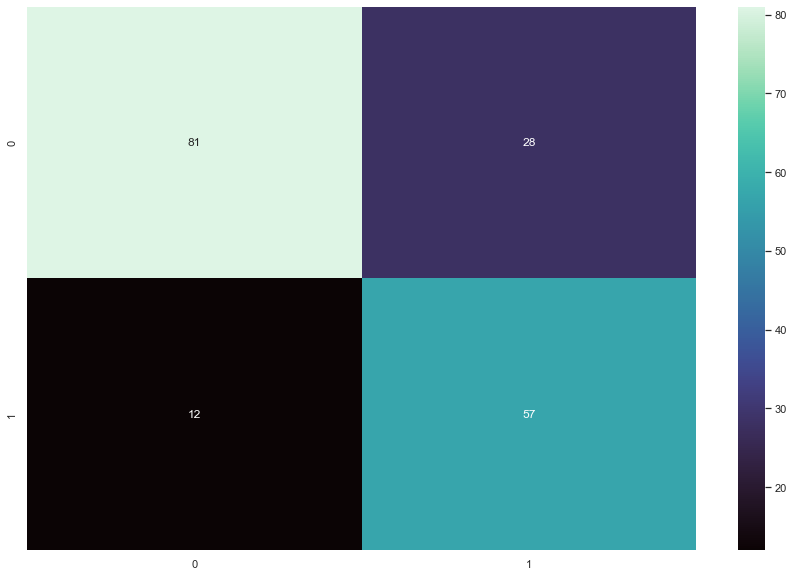

In [449]:
fig = plt.figure(figsize=(15, 10))
conf_mat = confusion_matrix(y_test, logreg_redict)
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='mako');

In [450]:
print(metrics.accuracy_score(y_test, logreg_redict))

0.7752808988764045


# K-NN

In [451]:
from sklearn.neighbors import KNeighborsClassifier
k_nn = KNeighborsClassifier()

param_grid_lr = {
    'leaf_size': [range(1, 50)],                      
    'n_neighbors': [range(1, 30)],   
    'p': (1, 2)}


k_nn_CV = GridSearchCV(estimator=k_nn, 
                      param_grid=param_grid, verbose=1, cv=5, n_jobs=-1)

k_nn_CV.fit(X_train, y_train)

Fitting 5 folds for each of 2842 candidates, totalling 14210 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]},
             verbose=1)

In [452]:
k_nn_CV.best_params_

{'leaf_size': 1, 'n_neighbors': 8, 'p': 2}

In [453]:
k_nn = KNeighborsClassifier(leaf_size=1, n_neighbors=5, p=1)
k_nn.fit(X_train, y_train)

k_nn_predict = k_nn.predict(X_test)

k_nn_predict_acc = metrics.accuracy_score(y_test, k_nn_predict)
k_nn_predict_precc = metrics.precision_score(y_test, k_nn_predict)
k_nn_predict_recall = metrics.recall_score(y_test, k_nn_predict)
k_nn_predict_f1 = metrics.f1_score(y_test, k_nn_predict)

In [454]:
print(classification_report(y_test, k_nn_predict))
print(metrics.confusion_matrix(y_test, k_nn_predict))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       109
           1       0.72      0.75      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.79      0.79      0.79       178

[[89 20]
 [17 52]]


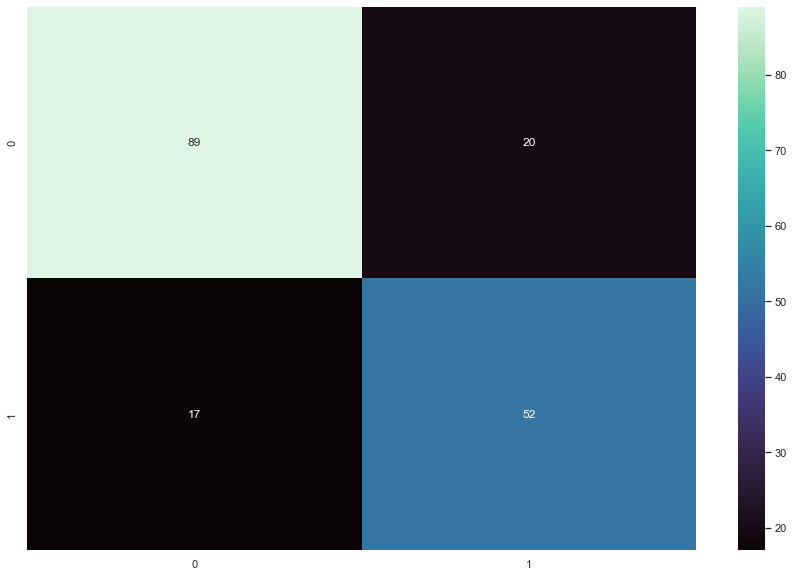

In [455]:
fig = plt.figure(figsize=(15, 10))
conf_mat = confusion_matrix(y_test, k_nn_predict)
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='mako');

In [456]:
print(metrics.accuracy_score(y_test, k_nn_predict))

0.7921348314606742


# SVM

In [459]:
from sklearn.svm import SVC
svm = SVC(C=1, gamma=0.1, kernel='rbf')
svm.fit(X_train, y_train)

SVC(C=1, gamma=0.1)

In [460]:
svm_res = svm.predict(X_test)

svm_res_acc = metrics.accuracy_score(y_test, svm_res)
svm_res_precc = metrics.precision_score(y_test, svm_res)
svm_res_recall = metrics.recall_score(y_test, svm_res)
svm_res_f1 = metrics.f1_score(y_test, svm_res)

print(classification_report(y_test, svm_res))
print(metrics.confusion_matrix(y_test, svm_res))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       109
           1       0.75      0.78      0.77        69

    accuracy                           0.81       178
   macro avg       0.80      0.81      0.81       178
weighted avg       0.82      0.81      0.82       178

[[91 18]
 [15 54]]


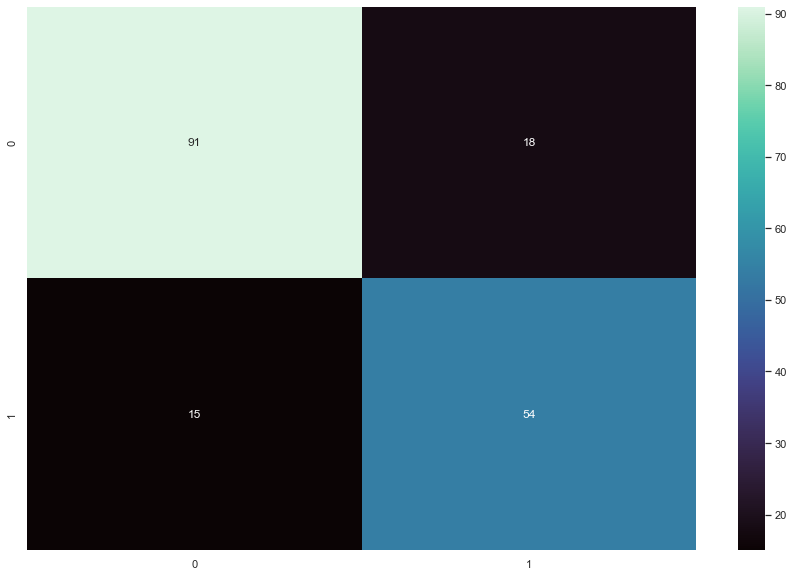

In [461]:
fig = plt.figure(figsize=(15, 10))
conf_mat = confusion_matrix(y_test, svm_res)
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='mako');

In [462]:
print(metrics.precision_score(y_test, svm_res))

0.75


# NAIVE BAYESS

In [463]:
from sklearn.naive_bayes import GaussianNB

bay = GaussianNB()
bay.fit(X_train, y_train)

GaussianNB()

In [464]:
print(bay.score(X_train, y_train))
print(bay.score(X_test, y_test))

0.7735583684950773
0.7528089887640449


In [465]:
cross_val_bay = cross_validate(bay, X_test, y_test, cv=10,
                               scoring=('roc_auc', 'accuracy'),
                               return_train_score=True)

print(cross_val_bay['test_roc_auc'], np.mean(cross_val_bay['test_roc_auc']))
print(cross_val_bay['test_accuracy'], np.mean(cross_val_bay['test_accuracy']))

[0.84415584 0.77922078 0.79220779 0.81818182 0.57142857 0.87012987
 0.83116883 0.96103896 0.72727273 0.7       ] 0.7894805194805194
[0.88888889 0.66666667 0.66666667 0.83333333 0.61111111 0.72222222
 0.83333333 0.94444444 0.58823529 0.58823529] 0.7343137254901959


In [466]:
bay_res = bay.predict(X_test)

bay_res_acc = metrics.accuracy_score(y_test, bay_res)
bay_res_precc = metrics.precision_score(y_test, bay_res)
bay_res_recall = metrics.recall_score(y_test, bay_res)
bay_res_f1 = metrics.f1_score(y_test, bay_res)

print(classification_report(y_test, bay_res))
print(metrics.confusion_matrix(y_test, bay_res))

              precision    recall  f1-score   support

           0       0.86      0.72      0.78       109
           1       0.64      0.81      0.72        69

    accuracy                           0.75       178
   macro avg       0.75      0.76      0.75       178
weighted avg       0.77      0.75      0.76       178

[[78 31]
 [13 56]]


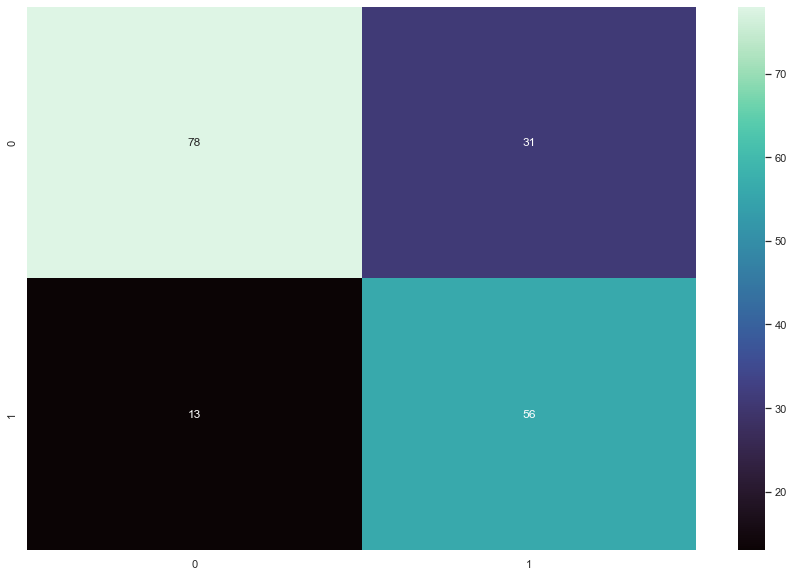

In [467]:
fig = plt.figure(figsize=(15, 10))
conf_mat = confusion_matrix(y_test, bay_res)
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='mako');

# DECISION TREE

In [468]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [469]:
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

1.0
0.7303370786516854


In [470]:
cross_val_tree = cross_validate(tree, X_test, y_test, cv=10,
                               scoring=('roc_auc', 'accuracy'),
                               return_train_score=True)

print(cross_val_tree['test_roc_auc'], np.mean(cross_val_tree['test_roc_auc']))
print(cross_val_tree['test_accuracy'], np.mean(cross_val_tree['test_accuracy']))

[0.88311688 0.62337662 0.67532468 0.64935065 0.57792208 0.85714286
 0.86363636 0.6038961  0.60606061 0.73571429] 0.7075541125541125
[0.88888889 0.66666667 0.66666667 0.66666667 0.61111111 0.88888889
 0.83333333 0.61111111 0.58823529 0.76470588] 0.718627450980392


In [471]:
tree_res = tree.predict(X_test)

tree_res_acc = metrics.accuracy_score(y_test, tree_res)
tree_res_precc = metrics.precision_score(y_test, tree_res)
tree_res_recall = metrics.recall_score(y_test, tree_res)
tree_res_f1 = metrics.f1_score(y_test, tree_res)

print(classification_report(y_test, tree_res))
print(metrics.confusion_matrix(y_test, tree_res))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       109
           1       0.63      0.72      0.68        69

    accuracy                           0.73       178
   macro avg       0.72      0.73      0.72       178
weighted avg       0.74      0.73      0.73       178

[[80 29]
 [19 50]]


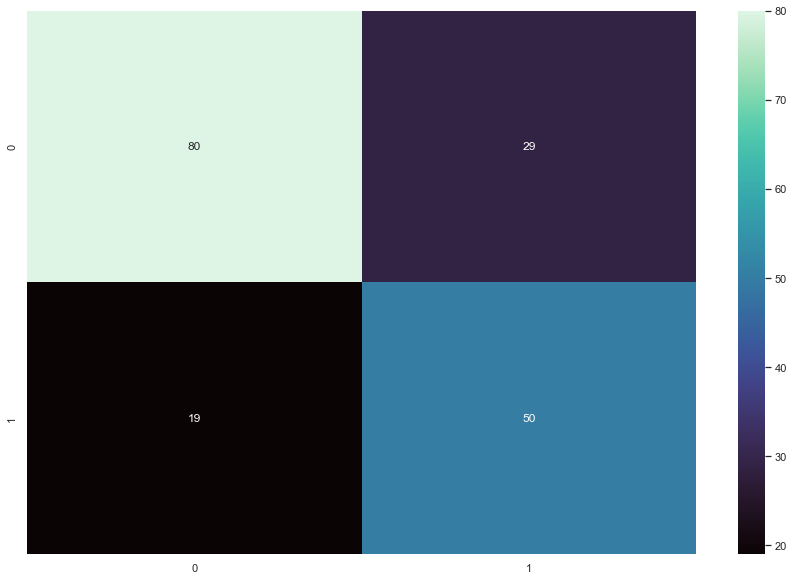

In [472]:
fig = plt.figure(figsize=(15, 10))
conf_mat = confusion_matrix(y_test, tree_res)
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='mako');

# RANDOM FOREST

In [474]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

parametrs = { 'n_estimators': range(1, 1000, 10),
              'criterion': ['gini', 'entropy']}

forestCV = GridSearchCV(forest, parametrs, cv=3, refit = True, verbose = 3)
forestCV.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV 1/3] END ....criterion=gini, n_estimators=1;, score=0.713 total time=   0.0s
[CV 2/3] END ....criterion=gini, n_estimators=1;, score=0.768 total time=   0.0s
[CV 3/3] END ....criterion=gini, n_estimators=1;, score=0.709 total time=   0.0s
[CV 1/3] END ...criterion=gini, n_estimators=11;, score=0.810 total time=   0.0s
[CV 2/3] END ...criterion=gini, n_estimators=11;, score=0.772 total time=   0.0s
[CV 3/3] END ...criterion=gini, n_estimators=11;, score=0.793 total time=   0.0s
[CV 1/3] END ...criterion=gini, n_estimators=21;, score=0.827 total time=   0.0s
[CV 2/3] END ...criterion=gini, n_estimators=21;, score=0.835 total time=   0.0s
[CV 3/3] END ...criterion=gini, n_estimators=21;, score=0.793 total time=   0.0s
[CV 1/3] END ...criterion=gini, n_estimators=31;, score=0.823 total time=   0.0s
[CV 2/3] END ...criterion=gini, n_estimators=31;, score=0.848 total time=   0.0s
[CV 3/3] END ...criterion=gini, n_estimators=3

[CV 3/3] END ..criterion=gini, n_estimators=331;, score=0.810 total time=   0.2s
[CV 1/3] END ..criterion=gini, n_estimators=341;, score=0.819 total time=   0.3s
[CV 2/3] END ..criterion=gini, n_estimators=341;, score=0.852 total time=   0.3s
[CV 3/3] END ..criterion=gini, n_estimators=341;, score=0.814 total time=   0.3s
[CV 1/3] END ..criterion=gini, n_estimators=351;, score=0.814 total time=   0.3s
[CV 2/3] END ..criterion=gini, n_estimators=351;, score=0.827 total time=   0.3s
[CV 3/3] END ..criterion=gini, n_estimators=351;, score=0.797 total time=   0.3s
[CV 1/3] END ..criterion=gini, n_estimators=361;, score=0.806 total time=   0.3s
[CV 2/3] END ..criterion=gini, n_estimators=361;, score=0.844 total time=   0.3s
[CV 3/3] END ..criterion=gini, n_estimators=361;, score=0.810 total time=   0.3s
[CV 1/3] END ..criterion=gini, n_estimators=371;, score=0.819 total time=   0.3s
[CV 2/3] END ..criterion=gini, n_estimators=371;, score=0.848 total time=   0.3s
[CV 3/3] END ..criterion=gin

[CV 3/3] END ..criterion=gini, n_estimators=671;, score=0.810 total time=   1.0s
[CV 1/3] END ..criterion=gini, n_estimators=681;, score=0.831 total time=   1.0s
[CV 2/3] END ..criterion=gini, n_estimators=681;, score=0.844 total time=   1.0s
[CV 3/3] END ..criterion=gini, n_estimators=681;, score=0.806 total time=   0.9s
[CV 1/3] END ..criterion=gini, n_estimators=691;, score=0.814 total time=   0.9s
[CV 2/3] END ..criterion=gini, n_estimators=691;, score=0.848 total time=   0.9s
[CV 3/3] END ..criterion=gini, n_estimators=691;, score=0.802 total time=   0.9s
[CV 1/3] END ..criterion=gini, n_estimators=701;, score=0.831 total time=   0.9s
[CV 2/3] END ..criterion=gini, n_estimators=701;, score=0.848 total time=   0.8s
[CV 3/3] END ..criterion=gini, n_estimators=701;, score=0.810 total time=   0.7s
[CV 1/3] END ..criterion=gini, n_estimators=711;, score=0.823 total time=   0.7s
[CV 2/3] END ..criterion=gini, n_estimators=711;, score=0.844 total time=   0.7s
[CV 3/3] END ..criterion=gin

[CV 1/3] END criterion=entropy, n_estimators=31;, score=0.810 total time=   0.0s
[CV 2/3] END criterion=entropy, n_estimators=31;, score=0.844 total time=   0.0s
[CV 3/3] END criterion=entropy, n_estimators=31;, score=0.806 total time=   0.0s
[CV 1/3] END criterion=entropy, n_estimators=41;, score=0.827 total time=   0.0s
[CV 2/3] END criterion=entropy, n_estimators=41;, score=0.848 total time=   0.0s
[CV 3/3] END criterion=entropy, n_estimators=41;, score=0.814 total time=   0.0s
[CV 1/3] END criterion=entropy, n_estimators=51;, score=0.823 total time=   0.0s
[CV 2/3] END criterion=entropy, n_estimators=51;, score=0.857 total time=   0.0s
[CV 3/3] END criterion=entropy, n_estimators=51;, score=0.827 total time=   0.0s
[CV 1/3] END criterion=entropy, n_estimators=61;, score=0.827 total time=   0.0s
[CV 2/3] END criterion=entropy, n_estimators=61;, score=0.848 total time=   0.0s
[CV 3/3] END criterion=entropy, n_estimators=61;, score=0.819 total time=   0.0s
[CV 1/3] END criterion=entro

[CV 3/3] END criterion=entropy, n_estimators=361;, score=0.806 total time=   0.4s
[CV 1/3] END criterion=entropy, n_estimators=371;, score=0.810 total time=   0.3s
[CV 2/3] END criterion=entropy, n_estimators=371;, score=0.844 total time=   0.3s
[CV 3/3] END criterion=entropy, n_estimators=371;, score=0.814 total time=   0.3s
[CV 1/3] END criterion=entropy, n_estimators=381;, score=0.819 total time=   0.4s
[CV 2/3] END criterion=entropy, n_estimators=381;, score=0.835 total time=   0.4s
[CV 3/3] END criterion=entropy, n_estimators=381;, score=0.814 total time=   0.4s
[CV 1/3] END criterion=entropy, n_estimators=391;, score=0.819 total time=   0.4s
[CV 2/3] END criterion=entropy, n_estimators=391;, score=0.848 total time=   0.4s
[CV 3/3] END criterion=entropy, n_estimators=391;, score=0.814 total time=   0.4s
[CV 1/3] END criterion=entropy, n_estimators=401;, score=0.823 total time=   0.4s
[CV 2/3] END criterion=entropy, n_estimators=401;, score=0.848 total time=   0.4s
[CV 3/3] END cri

[CV 1/3] END criterion=entropy, n_estimators=701;, score=0.823 total time=   0.8s
[CV 2/3] END criterion=entropy, n_estimators=701;, score=0.835 total time=   0.8s
[CV 3/3] END criterion=entropy, n_estimators=701;, score=0.814 total time=   0.9s
[CV 1/3] END criterion=entropy, n_estimators=711;, score=0.810 total time=   1.0s
[CV 2/3] END criterion=entropy, n_estimators=711;, score=0.852 total time=   0.8s
[CV 3/3] END criterion=entropy, n_estimators=711;, score=0.810 total time=   0.7s
[CV 1/3] END criterion=entropy, n_estimators=721;, score=0.814 total time=   0.8s
[CV 2/3] END criterion=entropy, n_estimators=721;, score=0.857 total time=   0.9s
[CV 3/3] END criterion=entropy, n_estimators=721;, score=0.810 total time=   0.9s
[CV 1/3] END criterion=entropy, n_estimators=731;, score=0.806 total time=   0.8s
[CV 2/3] END criterion=entropy, n_estimators=731;, score=0.857 total time=   0.9s
[CV 3/3] END criterion=entropy, n_estimators=731;, score=0.806 total time=   0.9s
[CV 1/3] END cri

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': range(1, 1000, 10)},
             verbose=3)

In [477]:
forestCV.best_params_

{'criterion': 'entropy', 'n_estimators': 111}

In [478]:
forest = RandomForestClassifier(criterion = 'entropy', n_estimators = 111)
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=111)

In [479]:
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

1.0
0.8033707865168539


In [480]:
forest_res = forest.predict(X_test)

forest_res_acc = metrics.accuracy_score(y_test, forest_res)
forest_res_precc = metrics.precision_score(y_test, forest_res)
forest_res_recall = metrics.recall_score(y_test, forest_res)
forest_res_f1 = metrics.f1_score(y_test, forest_res)

print(classification_report(y_test, forest_res))
print(metrics.confusion_matrix(y_test, forest_res))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       109
           1       0.75      0.74      0.74        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178

[[92 17]
 [18 51]]


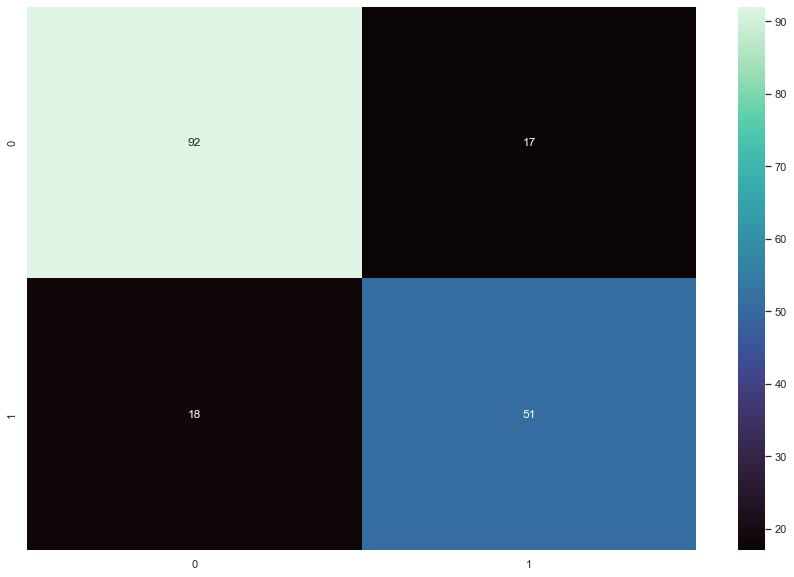

In [481]:
fig = plt.figure(figsize=(15, 10))
conf_mat = confusion_matrix(y_test, forest_res)
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='mako');

# MODELS COMPARISON

In [482]:
Model_Comparison = pd.DataFrame({
'Model' : ['Log Reg', 'KNNneighbors', 'SVM', 'Naive Bayes', 'Decision Tree','Random Forest', ],
'Accuracy Score' : [logreg_redict_acc, k_res_pred_acc, svm_res_acc,
                   bay_res_acc, tree_res_acc, forest_res_acc],
'Precision' : [logreg_redict_precc, k_res_pred_precc, svm_res_precc,
              bay_res_precc, tree_res_precc, forest_res_precc],
'Recall': [logreg_redict_recall, k_res_pred_recall, svm_res_recall,
          bay_res_recall, tree_res_recall, forest_res_recall],
'F1 Score': [logreg_redict_f1, k_res_pred_f1, svm_res_f1,
            bay_res_f1, tree_res_f1, forest_res_f1]})
Model_Comparison_df = Model_Comparison.sort_values(by='Accuracy Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Model')
Model_Comparison_df.reset_index()

,Model,Accuracy Score,Precision,Recall,F1 Score
0,SVM,0.814607,0.750000,0.782609,0.765957
1,Random Forest,0.803371,0.750000,0.739130,0.744526
2,KNNneighbors,0.792135,0.722222,0.753623,0.737589
3,Log Reg,0.775281,0.670588,0.826087,0.740260
4,Naive Bayes,0.752809,0.643678,0.811594,0.717949
5,Decision Tree,0.730337,0.632911,0.724638,0.675676


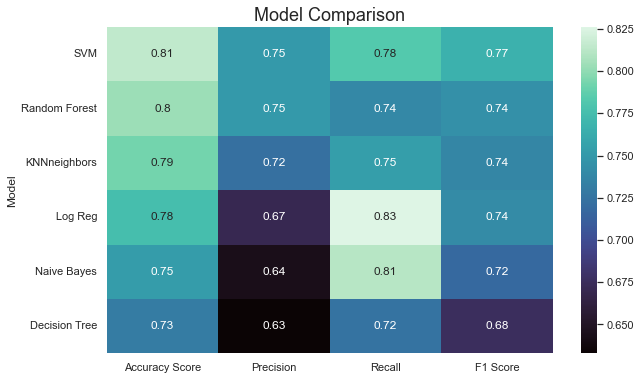

In [483]:
sns.set(rc={'figure.figsize':(10,6)})
sns.heatmap(Model_Comparison_df, annot=True, cmap='mako')
plt.title('Model Comparison', fontsize=18);

# TIME TO CHOSE FINAL MODEL

In [500]:
features = ["Pclass", "Sex", "SibSp", "Parch"]

y = df["Survived"]
X = df.drop('Survived', axis=1)
X = pd.get_dummies(df[features])


X_test = s_scaler.fit_transform(df_test)
X_test = pd.get_dummies(df_test[features])

final_mod = svm
final_mod.fit(X, y)

predictions = final_mod.predict(X_test)

output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
